In [125]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import Counter 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix,accuracy_score


In [126]:
def pca_transformation(data):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    principal_df = pd.DataFrame(data = principal_components
             ,columns = ['principal component 1', 'principal component 2'])
    return principal_df

In [127]:
def calculate_error(a,b):
    '''
    Given two Numpy Arrays, calculates the root of the sum of squared errores.
    '''
    error = np.square(np.sum((a-b)**2))

    return error   



def assign_centroid(data, centroids):
    '''
    Receives a dataframe of data and centroids and returns a list assigning each observation a centroid.
    data: a dataframe with all data that will be used.
    centroids: a dataframe with the centroids. For assignment the index will be used.
    '''

    n_observations = data.shape[0]
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]


    for observation in range(n_observations):

        # Calculate the errror
        errors = np.array([])
        for centroid in range(k):
            error = calculate_error(centroids.iloc[centroid, :2], data.iloc[observation,:2])
            errors = np.append(errors, error)

        # Calculate closest centroid & error 
        closest_centroid =  np.where(errors == np.amin(errors))[0].tolist()[0]
        centroid_error = np.amin(errors)

        # Assign values to lists
        centroid_assign.append(closest_centroid)
        centroid_errors.append(centroid_error)

    return (centroid_assign,centroid_errors)

def initialize_centroids(k, data):

    n_dims = data.shape[1]
    centroid_min = data.min().min()
    centroid_max = data.max().max()
    centroids = []

    for centroid in range(k):
        centroid = np.random.uniform(centroid_min, centroid_max, n_dims)
        centroids.append(centroid)

    centroids = pd.DataFrame(centroids, columns = data.columns)

    return centroids


def knn(data, k):
    '''
    Given a dataset and number of clusters, it clusterizes the data. 
    data: a DataFrame with all information necessary
    k: number of clusters to create
    '''

    # Initialize centroids and error
    centroids = initialize_centroids(k, data)
    error = []
    compr = True
    i = 0

    while(compr):
        # Obtain centroids and error
        data['centroid'], iter_error = assign_centroid(data,centroids)
        error.append(sum(iter_error))
        # Recalculate centroids
        centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)

        # Check if the error has decreased
        if(len(error)<2):
            compr = True
        else:
            if(round(error[i],3) !=  round(error[i-1],3)):
                compr = True
            else:
                compr = False
        i = i + 1 

    data['centroid'], iter_error = assign_centroid(data,centroids)
    centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)
    return (data['centroid'], iter_error, centroids)

In [128]:

small_iris_data = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/small_iris.csv")


In [129]:
small_iris_data.shape

(150, 2)

In [130]:
small_iris_data.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


### Innehåller datan konstiga värden?

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'petal length (cm)'}>]], dtype=object)

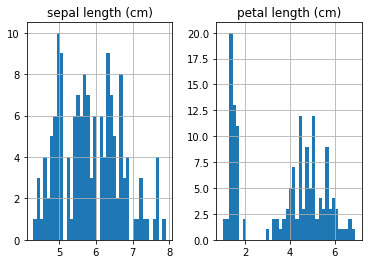

In [131]:
small_iris_data.hist(bins=40)

In [132]:
print(f'***Small iris***\n{small_iris_data.duplicated().value_counts()}')

***Small iris***
False    123
True      27
dtype: int64


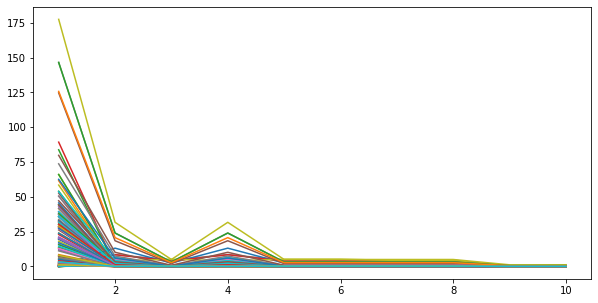

In [133]:
total_errors = []
for i in range(10):
    _,it_error, _= knn(small_iris_data[['sepal length (cm)','petal length (cm)']],i+1) 
    total_errors.append(it_error)
plt.figure(figsize=(10,5))
plt.plot(range(1,11), total_errors)

In [134]:
small_iris_data['centroid'], _, centroids =  knn(small_iris_data,3)
small_iris_data['centroid'].head()          

0    1
1    1
2    1
3    1
4    1
Name: centroid, dtype: int64

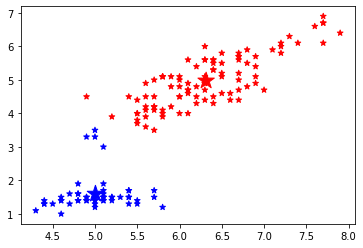

In [135]:
colors = {0:'red', 1:'blue', 2:'green',3:'yellow'}
plt.scatter(small_iris_data.iloc[:,0], small_iris_data.iloc[:,1],  marker = '*', c = small_iris_data['centroid'].apply(lambda x: colors[x]), alpha = 1)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = '*', s=300, 
           c = centroids.index.map(lambda x: colors[x]))

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

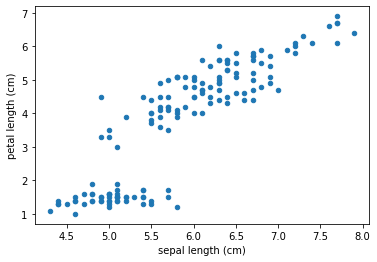

In [136]:

small_iris_data.plot.scatter(x="sepal length (cm)", y = "petal length (cm)")
